In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
# from pandas import ExcelWriter
# import xlsxwriter
# import xlwt

In [2]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions',  header=1, usecols='A:M')
df2 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic',  header=1, usecols='A:M')
df3 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress',  header=1, usecols='A:F')
df4 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList',  header=1, usecols='A:W')

C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_17640/4117248860.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df2 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic',  header=1, usecols='A:M')
C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_17640/4117248860.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df4 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList',  header=1, usecols='A:W')


In [3]:
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [4]:
df.count()

transaction_id             20000
product_id                 20000
customer_id                20000
transaction_date           20000
online_order               19640
order_status               20000
brand                      19803
product_line               19803
product_class              19803
product_size               19803
list_price                 20000
standard_cost              19803
product_first_sold_date    19803
dtype: int64

In [5]:
df.customer_id.nunique()

3494

In [6]:
# df1['product_first_sold_date'] = pd.to_datetime(df2['product_first_sold_date'], errors='coerce')

In [7]:
df2.count()

customer_id                            4000
first_name                             4000
last_name                              3875
gender                                 4000
past_3_years_bike_related_purchases    4000
DOB                                    3913
job_title                              3494
job_industry_category                  3344
wealth_segment                         4000
deceased_indicator                     4000
default                                3698
owns_car                               4000
tenure                                 3913
dtype: int64

In [8]:
df2.customer_id.count()

4000

In [9]:
df2.drop('default',axis = 1, inplace = True)

In [10]:
df2['DOB'] = pd.to_datetime(df2['DOB'], errors='coerce')


In [11]:
df2.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                        float64
dtype: object

In [12]:
now = pd.to_datetime('now')

In [13]:

a = (now - df2['DOB']).astype('<m8[Y]') 
df2.insert(6, "Age", value= a)

In [14]:
df2


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,67.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,40.0,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,67.0,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,60.0,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,44.0,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,46.0,VP Product Management,Health,Mass Customer,N,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,20.0,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,NaN,Assistant Manager,IT,High Net Worth,N,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,47.0,NaN,Manufacturing,Affluent Customer,N,Yes,10.0


In [15]:
df3.count()

customer_id           3999
address               3999
postcode              3999
state                 3999
country               3999
property_valuation    3999
dtype: int64

In [16]:
df3.customer_id.nunique()

3999

In [17]:
# for item in df2['Age']:
#     df2['Age']=df2['Age'].replace(to_replace= item>60.0, value='Unexpected', inplace= True)
# df2

In [18]:
df2['Age'].values[df2['Age'] > 100] = np.nan

In [19]:
df2['gender'].values[df2['gender'] == 'F'] = 'Female'

In [20]:
df2['gender'].values[df2['gender'] == 'Femal'] = 'Female'

In [21]:
df2['gender'].values[df2['gender'] == 'M'] = 'Male'

In [22]:
df3

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [23]:
df3['state'].values[df3['state'] == 'New South Wales'] = 'NSW'
df3['state'].values[df3['state'] == 'Victoria'] = 'VIC'

In [24]:
# with pd.ExcelWriter('Analysed_KPMG_VI_New_raw_data_update_final.xlsx', mode='a') as writer:
#     df.to_excel(writer,sheet_name='Transactions',index=False )
#     df2.to_excel(writer,sheet_name='CustomerDemographic',index=False )
#     df3.to_excel(writer,sheet_name='CustomerAddress',index=False)
#     df4.to_excel(writer,sheet_name='NewCustomerList',index=False)
    
    

In [25]:
df2 = pd.read_excel('Analysed_KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic', usecols='A:M')

In [26]:
df2

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,67.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,40.0,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,67.0,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,59.0,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,44.0,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,46.0,VP Product Management,Health,Mass Customer,N,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,20.0,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,NaN,Assistant Manager,IT,High Net Worth,N,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,47.0,NaN,Manufacturing,Affluent Customer,N,Yes,10.0


In [27]:
df2['gender'].value_counts(dropna= False)

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

[Text(0, 0, '2039'), Text(0, 0, '1873'), Text(0, 0, '88')]

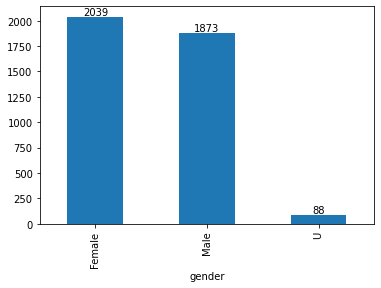

In [28]:
a = df2.groupby('gender')['customer_id'].nunique().plot(kind='bar')
# a
a.bar_label(a.containers[0])

[Text(0, 0, '0'),
 Text(0, 0, '18'),
 Text(0, 0, '656'),
 Text(0, 0, '656'),
 Text(0, 0, '1343'),
 Text(0, 0, '712'),
 Text(0, 0, '522'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '0')]

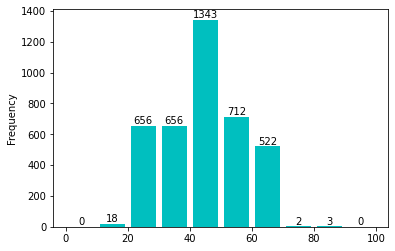

In [29]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
b = df2['Age'].plot.hist('Age', bins, histtype = 'bar', rwidth=0.8, color='c')
# b
b.bar_label(b.containers[0])

In [30]:
df2['wealth_segment'].value_counts(dropna= False)

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

[Text(0, 0, '962'), Text(0, 0, '996'), Text(0, 0, '1954')]

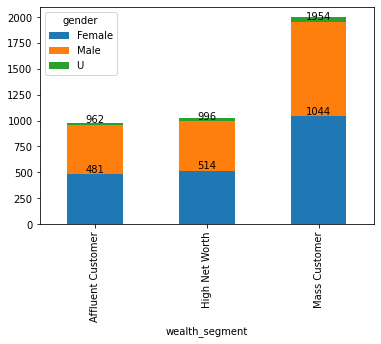

In [31]:
age=[20,40,60,80,100]

ax = df2.groupby(['wealth_segment','gender'])['customer_id'].size().unstack().plot(kind='bar', stacked=True)
# df2.groupby(['wealth_segment','gender'])['customer_id'].size().groupby(level=0).apply(lambda x:100*x/x.sum()).unstack().plot(kind='bar', stacked=True)
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x()*.50, p.get_height()*1.00))


<AxesSubplot:xlabel='gender'>

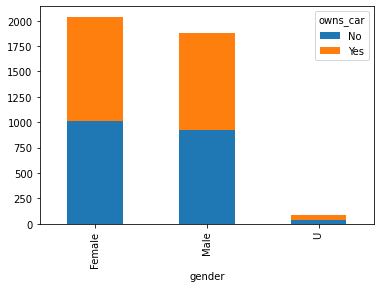

In [32]:
df2.groupby(['gender', 'owns_car'])['customer_id'].size().unstack().plot(kind='bar', stacked=True)

[Text(0, 0, '113'),
 Text(0, 0, '136'),
 Text(0, 0, '774'),
 Text(0, 0, '602'),
 Text(0, 0, '223'),
 Text(0, 0, '799'),
 Text(0, 0, '267'),
 Text(0, 0, '358'),
 Text(0, 0, '72')]

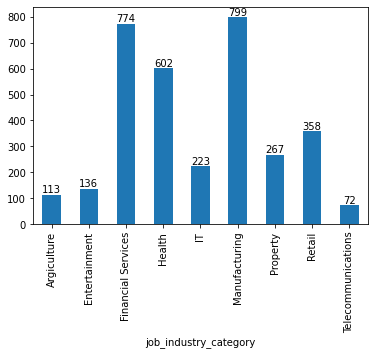

In [33]:
c= df2.groupby('job_industry_category')['customer_id'].nunique().plot(kind='bar')
c.bar_label(c.containers[0])

In [34]:
df2['job_industry_category'].value_counts(dropna= False)

Manufacturing         799
Financial Services    774
NaN                   656
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64